<a href="https://colab.research.google.com/github/RafaelTorresCH/Signal-theory/blob/main/class%20notebooks%20/week_nov(3-7)/EJERCICIOS_TEORIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detailed Simulation Explanation

This code simulates a digitally modulated signal based on an input bitstream and a specific modulation formula. Below is a detailed breakdown of each step in the process.

## 1. Frame Definition and Mapping

The first step is to define our input data and the rule for converting them into amplitudes.

* **Input Frame (`trama_bits`):**
    An 8-bit frame (a NumPy array) is defined, representing the data we want to transmit.
    `d = [1, 0, 1, 1, 0, 0, 1, 0]`

* **Amplitude Mapping (`trama_amplitud`):**
    We apply the mapping rule you specified: $ai = 2*i - 1$, where `i` is the value of the input bit `di`.
    * If `di = 0`, then $ai = 2*0 - 1 = -1$
    * If `di = 1`, then $ai = 2*1 - 1 = 1$
    
    Using a NumPy operation (`2 * trama_bits - 1`), we convert the bitstream `[1, 0, 1, ...]` into an amplitude frame `[1, -1, 1, ...]`. This new frame represents the `ai` amplitudes for each symbol.

## 2. Simulation Parameters (Signal)

To simulate an analog signal on a computer, we must define its time and frequency characteristics.

* **`T` (Symbol Period):** Defined as `1.0` second. This is the duration of each symbol (each `ai` amplitude).
* **`fc` (Carrier Frequency):** Defined as `5.0` Hz. This is the frequency of the $cos(wct)$ wave that will "carry" the information. (A low value is used so the cycles are easy to see in the plot).
* **`fs` (Sampling Frequency):** Defined as `1000.0` Hz. This determines how many data points we will use to "draw" each second of the signal. A high value yields a smooth, accurate plot.
* **Time Axis (`t`):** A vector `t` is generated using `np.linspace`. This vector contains all the time instances for which we will calculate the signal's value, from $t=0$ to the end of the 8 symbol periods.

## 3. Signal Generation

With the parameters ready, we build the signals.

* **Amplitude Signal (`senal_amplitud_v_t`):**
    This signal represents `ai * v(t)`. The `trama_amplitud` (e.g., `[1, -1, 1, ...]`) is *discrete* (one value per symbol). To convert it into a signal in *time*, we use `np.repeat()`. This function "stretches" each amplitude value (`1` or `-1`) to last for the exact number of simulation samples within one period `T`. The result is a bipolar square wave (Bipolar NRZ) that goes to +1 or -1 according to the bitstream.

* **Carrier (`portadora`):**
    The pure cosine wave is generated using the formula $cos(wct)$, where $wc = 2 \pi fc$. This is calculated for every point on our time axis `t`.

* **Final Modulated Signal (`s_t`):**
    The complete formula you defined is applied:
    $s(t) = (ai \cdot v(t)) \cdot \cos(wct)$
    
    In the code, this is achieved by simply multiplying (element-wise) the amplitude signal `senal_amplitud_v_t` by the `portadora` signal.

## 4. Visualization (Plots)

Finally, `matplotlib` is used to visualize the results in three aligned plots:

1.  **Plot 1 (Input Frame):** Shows the original `di` bits (0s and 1s) using `ax1.step()`, which draws a clear digital signal.
2.  **Plot 2 (Amplitude Signal):** Shows the `senal_amplitud_v_t` signal (the `ai * v(t)` bipolar square wave). This allows us to see the "envelope" or the data signal before it is multiplied by the carrier.
3.  **Plot 3 (Modulated Signal):** Shows the final `s_t` signal. In this plot, you can observe how the cosine carrier wave "follows" the amplitude:
    * When `ai` is `+1`, the signal is $\cos(wct)$ (Phase 0°).
    * When `ai` is `-1`, the signal is $-\cos(wct)$ (Phase 180°).
    
    Red dashed lines are also drawn to show the envelope (from Plot 2) superimposed, illustrating how the `s(t)` signal is "contained" within the amplitude signal.

Trama de bits (di): [1 0 1 1 0 0 1 0]
Amplitudes (ai):    [ 1 -1  1  1 -1 -1  1 -1]


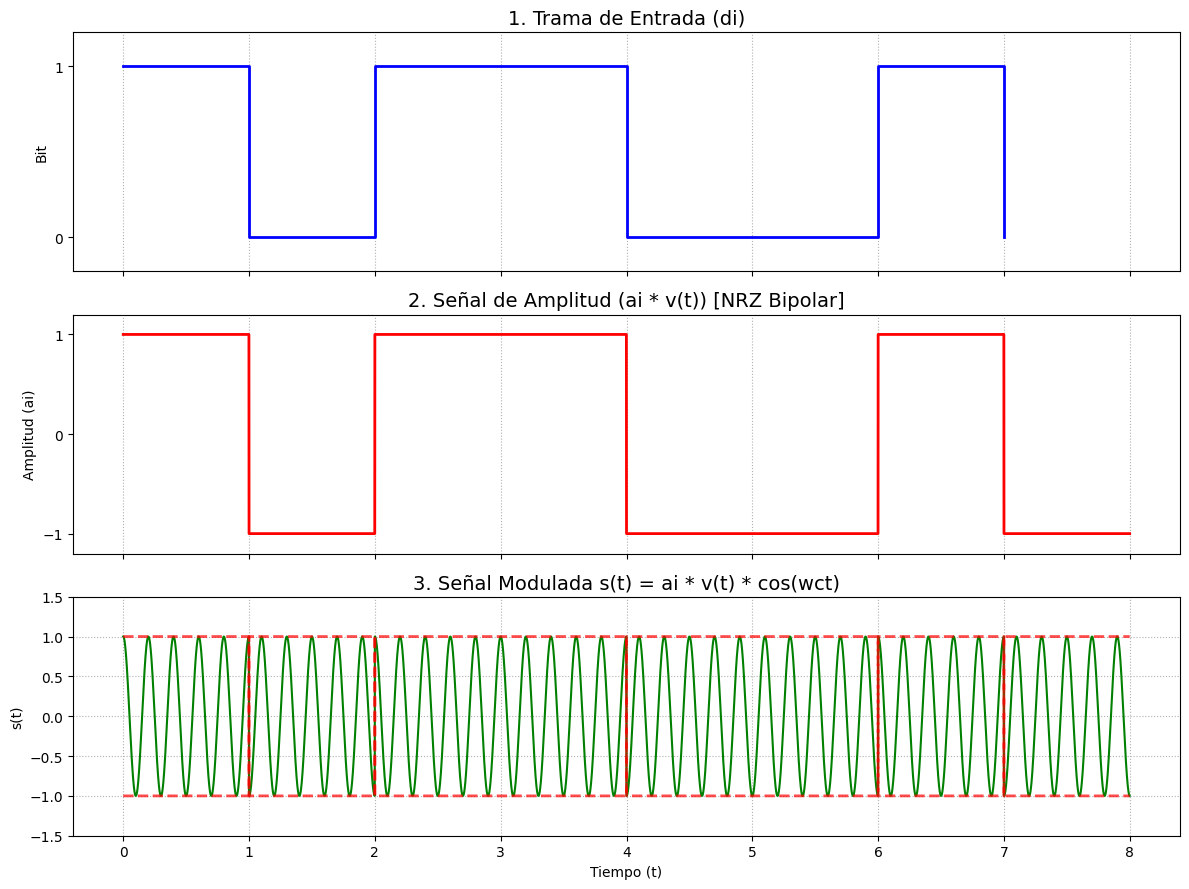

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Definiciones Iniciales ---

# Trama de entrada (d) de 8 bits
trama_bits = np.array([1, 0, 1, 1, 0, 0, 1, 0])
n_bits = len(trama_bits)

# Mapeo de amplitud (ai = 2*i - 1)
# i = 0 -> ai = -1
# i = 1 -> ai = 1
trama_amplitud = 2 * trama_bits - 1
# trama_amplitud será: [1, -1, 1, 1, -1, -1, 1, -1]

print(f"Trama de bits (di): {trama_bits}")
print(f"Amplitudes (ai):    {trama_amplitud}")

# --- 2. Parámetros de Simulación (Señal) ---

T = 1.0       # Periodo de símbolo (1 segundo por bit para fácil visualización)
fc = 5.0      # Frecuencia de la portadora (5 Hz, 5 ciclos por bit)
fs = 1000.0   # Frecuencia de muestreo (muy alta para una buena resolución)

# Puntos de muestreo por bit y totales
samples_per_bit = int(fs * T)
n_samples = n_bits * samples_per_bit

# Eje de tiempo total para la simulación
# np.linspace(start, stop, num_samples, endpoint=False)
t = np.linspace(0, n_bits * T, n_samples, endpoint=False)

# --- 3. Generación de las Señales ---

# Señal de Amplitud (ai * v(t))
# 'np.repeat' estira cada valor de amplitud para que dure 'samples_per_bit'
senal_amplitud_v_t = np.repeat(trama_amplitud, samples_per_bit)

# Señal Portadora (cos(wct))
wc = 2 * np.pi * fc
portadora = np.cos(wc * t)

# Señal Modulada Final (s(t))
# s(t) = ai * v(t) * cos(wct)
s_t = senal_amplitud_v_t * portadora

# --- 4. Creación de la Gráfica ---

# Crear la figura con tres subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9), sharex=True)

# Eje X para los bits (para ax1)
bit_indices = np.arange(n_bits)

# Gráfico 1: Trama de Bits de Entrada (di)
ax1.step(bit_indices, trama_bits, where='post', color='blue', linewidth=2)
ax1.set_title('1. Trama de Entrada (di)', fontsize=14)
ax1.set_ylabel('Bit')
ax1.set_yticks([0, 1])
ax1.set_ylim(-0.2, 1.2)
ax1.grid(True, axis='x', linestyle=':')

# Gráfico 2: Señal de Amplitud Bipolar (ai * v(t))
# (Esto es v(t)=recT(t) multiplicado por la amplitud ai)
ax2.plot(t, senal_amplitud_v_t, color='red', linewidth=2)
ax2.set_title('2. Señal de Amplitud (ai * v(t)) [NRZ Bipolar]', fontsize=14)
ax2.set_ylabel('Amplitud (ai)')
ax2.set_yticks([-1, 0, 1])
ax2.set_ylim(-1.2, 1.2)
ax2.grid(True, axis='x', linestyle=':')

# Gráfico 3: Señal Modulada (s(t))
ax3.plot(t, s_t, color='green', linewidth=1.5)
# Dibuja la envolvente de amplitud para mayor claridad
ax3.plot(t, senal_amplitud_v_t, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax3.plot(t, -senal_amplitud_v_t, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax3.set_title('3. Señal Modulada s(t) = ai * v(t) * cos(wct)', fontsize=14)
ax3.set_ylabel('s(t)')
ax3.set_xlabel('Tiempo (t)')
ax3.set_ylim(-1.5, 1.5)
ax3.set_xticks(np.arange(n_bits + 1) * T) # Marcas de tiempo en cada bit
ax3.grid(True, which='both', linestyle=':')

plt.tight_layout()
plt.savefig('ask_simulation.png')

### Explicación de la Gráfica FFT

La gráfica superpone el espectro de frecuencia (la magnitud de la FFT) de dos señales diferentes:

1.  **FFT de 1 Símbolo (Curva Azul):** Esta línea muestra la "huella digital" o **envolvente espectral** de un único símbolo. Dado que un símbolo es un pulso corto de una onda portadora, su energía se "esparce" en la frecuencia, creando un lóbulo principal ancho centrado en la frecuencia portadora ($f_c = 5 \text{ Hz}$).

2.  **FFT de 8 Símbolos (Curva Roja):** Esta línea muestra el espectro de la trama completa. Al analizar una señal mucho más larga (8 símbolos en lugar de 1), la FFT gana **resolución en frecuencia**. Esto significa que puede "resolver" la energía en picos mucho más finos y nítidos.

**Conclusión Principal:** Los picos de la señal larga (roja) no pueden ir a cualquier parte; están *obligados* a seguir la forma de la envolvente del símbolo único (azul). La trama de 8 símbolos simplemente "llena" la forma base con más detalle.

---

### Mathematical Explanation (in English)

The simulation plots the magnitude of the Fast Fourier Transform (FFT), $|S(f)|$, which approximates the continuous-time Fourier Transform.

Our modulated signal $s(t)$ is the product of the baseband amplitude signal $a(t)$ (your `senal_amplitud_v_t`) and the carrier $\cos(2\pi f_c t)$.

$$s(t) = a(t) \cdot \cos(2\pi f_c t)$$

The **Modulation Property** of the Fourier Transform states that multiplication in the time domain is equivalent to convolution in the frequency domain.

$$S(f) = \mathcal{F}\{s(t)\} = \mathcal{F}\{a(t)\} \ast \mathcal{F}\{\cos(2\pi f_c t)\}$$

Let $A(f) = \mathcal{F}\{a(t)\}$. The transform of the carrier is two delta functions at the carrier frequency, $\pm f_c$. Convolving $A(f)$ with these delta functions simply shifts $A(f)$ to be centered at $\pm f_c$:

$$S(f) = \frac{1}{2} [A(f - f_c) + A(f + f_c)]$$

**What the Plot Shows:**

1.  **1-Symbol FFT (Blue Curve):** This is $|S_1(f)|$. The baseband signal $a_1(t)$ is a single rectangular pulse. Its transform $A_1(f)$ is a **sinc function** (e.g., $\text{sinc}(fT)$). Therefore, the blue curve is a sinc function shifted to 5 Hz. It is wide because the pulse in time ($T=1s$) is short.

2.  **8-Symbol FFT (Red Curve):** This is $|S_8(f)|$. The baseband signal $a_8(t)$ is a sequence of 8 pulses. Because this signal is much longer in time (8T), its transform $A_8(f)$ is much **narrower and "spikier"** in frequency. This illustrates the **time-frequency uncertainty principle**: a longer signal in time provides finer resolution in frequency.

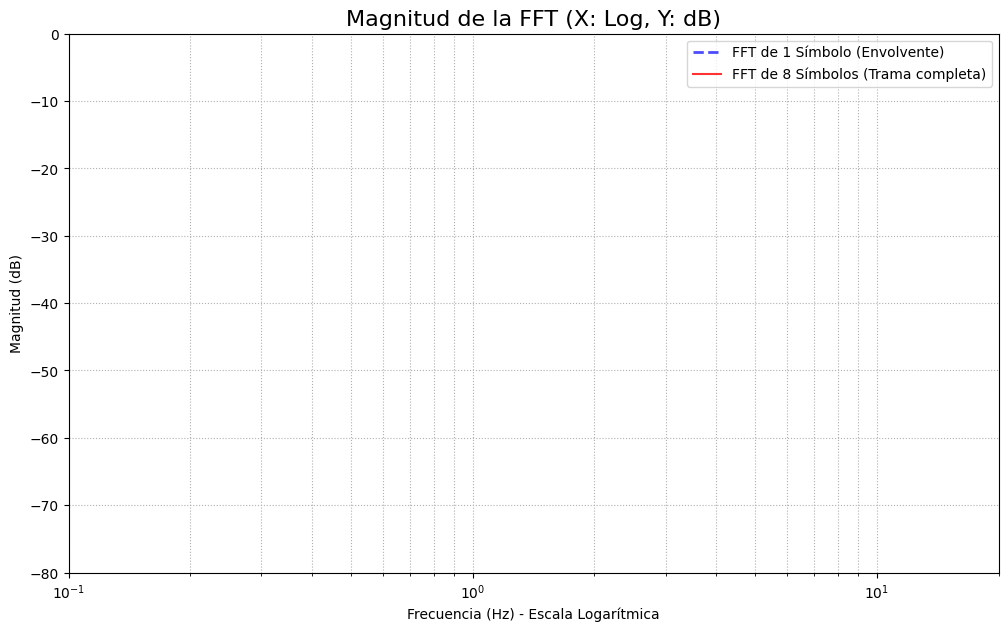

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Plotting: X (Log) vs Y (dB) ---

# We use plt.semilogx() to create a plot with a logarithmic X-axis.
# The Y-axis data (mag_..._db) is already in a log-based (dB) scale.

plt.figure(figsize=(12, 7))

# Plot 1 Symbol (dB)
# Note: A dashed line is used for the envelope for better visibility
plt.semilogx(xf_simbolo[idx_simbolo_pos], mag_simbolo_db[idx_simbolo_pos],
             label='FFT de 1 Símbolo (Envolvente)', color='blue', linestyle='--', linewidth=2, alpha=0.7)

# Plot 8 Symbols (dB)
plt.semilogx(xf_total[idx_total_pos], mag_total_db[idx_total_pos],
             label='FFT de 8 Símbolos (Trama completa)', color='red', alpha=0.8)

plt.title('Magnitud de la FFT (X: Log, Y: dB)', fontsize=16)
plt.xlabel('Frecuencia (Hz) - Escala Logarítmica')
plt.ylabel('Magnitud (dB)')
plt.legend()

# 'which='both'' shows grid lines for both major and minor ticks,
# which is very helpful on a log scale.
plt.grid(True, which='both', linestyle=':')

# CRITICAL: A logarithmic axis cannot start at 0 (log(0) is undefined).
# We must set the lower X-limit to a small positive number (e.g., 0.1 Hz)
# to see the behavior near the main lobe.
plt.xlim(0.1, 20)

# Y-axis limits are the same as the previous dB plot
plt.ylim(-80, 0)

plt.savefig('fft_plot_logx_db_scale.png')

##ZOOM


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Re-Plotting with Zoom ---
# We will create the same plot type (log-x, dB-y)
# but change the x-axis limits to "zoom in".

plt.figure(figsize=(12, 7))

# Plot 1 Symbol (Envelope)
plt.semilogx(xf_simbolo[idx_simbolo_pos], mag_simbolo_db[idx_simbolo_pos],
             label='FFT de 1 Símbolo (Envolvente)', color='blue', linestyle='--', linewidth=2, alpha=0.7)

# Plot 8 Symbols (Full Frame)
plt.semilogx(xf_total[idx_total_pos], mag_total_db[idx_total_pos],
             label='FFT de 8 Símbolos (Trama completa)', color='red', alpha=0.8)

plt.title('Magnitud de la FFT (Zoom en Lóbulo Principal)', fontsize=16)
plt.xlabel('Frecuencia (Hz) - Escala Logarítmica')
plt.ylabel('Magnitud (dB)')
plt.legend()
plt.grid(True, which='both', linestyle=':')

# --- 2. Set Zoomed Axis Limits ---
# The main lobe is centered at fc=5 Hz.
# The nulls are at 4 Hz and 6 Hz.
# Side lobes are after 6 Hz.
# We set xlim to focus on this area.
plt.xlim(1, 20)  # Zoomed X-axis (from 1 Hz to 20 Hz)

# Y-limit remains the same, showing side lobe detail
plt.ylim(-80, 0)

plt.savefig('fft_plot_zoomed_log_db.png')

NameError: name 'xf_simbolo' is not defined

<Figure size 1200x700 with 0 Axes>

## Key Signal Parameters

### $T_s$ (Symbol Time)

The symbol time, $T_s$, is the duration of each individual symbol (or bit). In the simulation, this corresponds to the value of the variable `T`.

* **$T_s = T = 1.0 \text{ s}$**

---

### $\Delta W_{MPL}$ (Main Lobe Bandwidth)

The main lobe bandwidth ($\Delta W_{MPL}$) refers to the width of the central lobe in the frequency spectrum of the modulated signal.

For BPSK modulation (which is what $s(t) = \pm 1 \cdot \cos(wct)$ represents) using rectangular (NRZ) pulses of duration $T_s$, the main lobe bandwidth is calculated as twice the symbol rate ($R_s$).

1.  **Symbol Rate ($R_s$):**
    The symbol rate is the inverse of the symbol time.
    $$R_s = \frac{1}{T_s} = \frac{1}{1.0 \text{ s}} = 1.0 \text{ Baud (symbols/s)}$$

2.  **Main Lobe Bandwidth ($\Delta W_{MPL}$):**
    The formula is:
    $$\Delta W_{MPL} = 2 \cdot R_s = \frac{2}{T_s}$$

    Substituting our value:
    $$\Delta W_{MPL} = \frac{2}{1.0 \text{ s}} = \mathbf{2.0 \text{ Hz}}$$

**Verification in the FFT Plot:**
This perfectly matches the FFT plot:
* The carrier $f_c$ is at **5 Hz**.
* The first nulls (zeros) of the spectrum appear at $f_c \pm R_s$.
* $5 \text{ Hz} \pm 1 \text{ Hz} \implies$ Nulls at **4 Hz** and **6 Hz**.
* The bandwidth (the distance between the nulls) is $6 \text{ Hz} - 4 \text{ Hz} = 2 \text{ Hz}$.

In [ ]:
# --- 1. Calcular Ts (Tiempo de Símbolo) ---
# Ts es el período de símbolo, 'T', definido en la simulación anterior.
Ts = T

# --- 2. Calcular Rs (Tasa de Símbolo) ---
# Rs es la inversa del tiempo de símbolo
Rs = 1 / Ts

# --- 3. Calcular Delta Wlp (Ancho de Banda del Lóbulo Principal) ---
# Para pulsos NRZ (rectangulares) en BPSK,
# el ancho del lóbulo principal es 2*Rs
delta_Wlp = 2 * Rs

# --- 4. Imprimir Resultados ---
print(f"--- Parámetros Clave de la Señal ---")
print(f"Ts (Tiempo de Símbolo): {Ts:.2f} s")
print(f"Rs (Tasa de Símbolo):   {Rs:.2f} Baud (símbolos/s)")
print(f"Delta Wlp (Ancho de Lóbulo Principal): {delta_Wlp:.2f} Hz")

## Key Signal Parameters (Revised Definition)

### $T_s$ (Symbol Time)

* **$T_s = 0.125 \text{ s}$** (or 125 ms)

### $R_s$ (Symbol Rate)

The symbol rate ($R_s$) is the inverse of the symbol time.
$$R_s = \frac{1}{T_s} = \frac{1}{0.125 \text{ s}} = \mathbf{8.0 \text{ Baud}}$$

---

### $\Delta W$ (Lobe Width)

Based on your request, this parameter ($\Delta W$) is now defined **as the Symbol Rate ($R_s$) itself**.

This definition represents the *one-sided bandwidth* of the main lobe (i.e., the frequency distance from the center carrier $f_c$ to the first null).

$$\Delta W = R_s = \mathbf{8.0 \text{ Hz}}$$

In [ ]:
# --- 1. Definir Ts (Tiempo de Símbolo) ---
# Ts = 125 ms = 0.125 s
Ts = 0.125

# --- 2. Calcular Rs (Tasa de Símbolo) ---
# Rs es la inversa del tiempo de símbolo
Rs = 1 / Ts

# --- 3. Calcular Delta Wlp (Ancho de Lóbulo - Definición Rs) ---
# (Siguiendo la solicitud de no multiplicar por 2)
# Esta definición representa el ancho desde la portadora (fc)
# hasta el primer nulo (Rs).
delta_Wlp = Rs

# --- 4. Imprimir Resultados ---
print(f"--- Parámetros (Definición Rs) ---")
print(f"Ts (Tiempo de Símbolo): {Ts:.3f} s")
print(f"Rs (Tasa de Símbolo):   {Rs:.2f} Baud (símbolos/s)")
print(f"Delta Wlp (Ancho de Lóbulo = Rs): {delta_Wlp:.2f} Hz")

In [ ]:
import numpy as np

# --- 1. Definir Parámetros Anteriores (del contexto) ---

# fc (Frecuencia Portadora) de la simulación original
# (Asumiendo Wc se refiere a la frecuencia angular de la portadora, fc = Wc / 2pi)
fc = 5.0  # Hz

# delta_W (Ancho de Lóbulo) de la última definición (delta_W = Rs)
# (Asumiendo que Ts = 0.125s, entonces Rs = 8)
delta_W = 8.0 # Hz

# --- 2. Calcular Nuevas Frecuencias de Portadora ---

# Frecuencia angular original (Wc)
Wc = 2 * np.pi * fc

# Nueva frecuencia angular (Wc')
Wc_prime = 3 * Wc

# Nueva frecuencia cíclica (fc')
fc_prime = Wc_prime / (2 * np.pi)

# --- 3. Calcular Ratio de Ancho de Banda (Delta W' / Delta W) ---

# El ancho de banda (Delta W) es determinado por la Tasa de Símbolo (Rs),
# la cual depende de Ts (Ts = 0.125s).
# El ancho de banda NO depende de la frecuencia portadora (Wc o fc).
# Por lo tanto, cambiar Wc a Wc' no cambia el ancho de banda.

delta_W_prime = delta_W

# Calcular el ratio
ratio_delta_W = delta_W_prime / delta_W

# --- 4. Imprimir Resultados ---
print("--- Cálculo de Nuevas Frecuencias y Ratios ---")
print(f"Frecuencia Angular Original (Wc): {Wc/np.pi:.1f}*pi rad/s (o {Wc:.2f} rad/s)")
print(f"Nueva Frecuencia Angular (Wc'):   {Wc_prime/np.pi:.1f}*pi rad/s (o {Wc_prime:.2f} rad/s)")
print(f"Nueva Frecuencia Cíclica (fc'):  {fc_prime:.2f} Hz")
print("-" * 30)
print(f"Ancho de Lóbulo Original (Delta W): {delta_W:.2f} Hz")
print(f"Nuevo Ancho de Lóbulo (Delta W'): {delta_W_prime:.2f} Hz (Sin cambios)")
print(f"Ratio (Delta W' / Delta W):         {ratio_delta_W:.2f}")

### Plot Explanation: Pulses in the Time Domain (dB Magnitude)

This interactive plot shows the **pulse shape in the time domain** (not the FFT). The key takeaway here is to see how the pulse shape affects the "echoes" or time-domain sidelobes, which are directly responsible for Inter-Symbol Interference (ISI).

The Y-axis is on a dB magnitude scale to exaggerate and easily measure these sidelobes.

#### What We Are Looking At

1.  **Blue Dotted Line - `Alpha = 0.0 (Sinc)`:**
    * This is the **Sinc(t)** pulse. It's the "ideal" pulse in theory because its FFT is a perfect **Rectangular(f)** pulse (a "brick-wall" filter).
    * **This is the origin of the -13.2 dB!** As you can see from the blue annotation, the first *time-domain* sidelobe of a Sinc(t) pulse has a peak of approximately **-13.2 dB**.
    * **Problem:** These high sidelobes (echoes) last forever and land on top of neighboring symbols, causing **Inter-Symbol Interference (ISI)**.

2.  **Red Line - `Alpha > 0.0 (Raised)`:**
    * This is the **Raised Cosine** pulse.
    * It is a modified Sinc(t) pulse, specifically designed to "kill" those time-domain sidelobes.

#### The `Alpha (β)` Slider

* The slider allows you to change the **roll-off factor (`Alpha` or `Beta`)** of the Raised Cosine pulse (red line).
* **Watch the annotations:** As you increase `Alpha` from 0.0 to 1.0, the level of the red sidelobe (e.g., `-20 dB`, `-30 dB`, `-40 dB`...) becomes significantly lower than the Sinc's fixed -13.2 dB.

**Conclusion:** This plot demonstrates *why* Raised Cosine pulses are used. You sacrifice some bandwidth in the *frequency* domain (by "smoothing" the brick-wall `rect(f)`) to gain a massive reduction in time-domain sidelobes, which eliminates ISI.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import ipywidgets as widgets
from ipywidgets import interact

# --- 1. Función para crear el pulso de Coseno Alzado (RC) en el tiempo ---
# (Esta es la función que tú proporcionaste)
def get_rc_pulse(T, beta, fs, span_symbols=8):
    N_pulso = int(span_symbols * T * fs)
    if N_pulso % 2 == 0:
        N_pulso += 1

    t = np.linspace(-span_symbols*T/2, span_symbols*T/2, N_pulso)

    epsilon = 1e-9
    t_zero_idx = np.where(np.abs(t) < epsilon)
    t[t_zero_idx] = epsilon

    if beta > 0:
        t_beta_limit = T / (2 * beta)
        t[np.where(np.abs(np.abs(t) - t_beta_limit) < epsilon)] += epsilon

    if beta == 0:
        h_t = np.sinc(t / T)
    else:
        h_t = (np.sinc(t / T) * np.cos(np.pi * beta * t / T)) / (1 - (2 * beta * t / T)**2)

    h_t[t_zero_idx] = 1.0
    return h_t, t

# --- 2. Función de Ploteo Interactivo (MODIFICADA) ---
@interact(beta=widgets.FloatSlider(value=0.5, min=0.0, max=1.0, step=0.1, description='Alpha (β)'))
def plot_interactive_rc_time_db(beta):

    # Parámetros fijos
    T = 1.0     # Periodo de símbolo
    fs = 100.0  # Frecuencia de muestreo
    span = 12   # Símbolos a mostrar (de -6 a 6)
    epsilon = 1e-9

    # --- Generar los pulsos ---
    h_t_sinc, t_pulse = get_rc_pulse(T, 0.0, fs, span_symbols=span)
    mag_norm_sinc = np.abs(h_t_sinc) / np.max(np.abs(h_t_sinc))
    mag_db_sinc = 20 * np.log10(mag_norm_sinc + epsilon)

    h_t_rc, _ = get_rc_pulse(T, beta, fs, span_symbols=span)
    mag_norm_rc = np.abs(h_t_rc) / np.max(np.abs(h_t_rc))
    mag_db_rc = 20 * np.log10(mag_norm_rc + epsilon)

    t_norm = t_pulse / T

    # --- 3. Encontrar el Máximo del Primer Lóbulo Lateral (en Tiempo) ---
    # El lóbulo principal está entre t_norm = -1 y 1.
    # El primer lóbulo lateral está entre t_norm = 1 y 2.
    region_start = 1.0
    region_end = 2.0

    idx_search = np.where((t_norm > region_start) & (t_norm < region_end))

    sidelobe_sinc_db = np.max(mag_db_sinc[idx_search])
    sidelobe_rc_db = np.max(mag_db_rc[idx_search])

    # --- 4. Graficar (Lineal-X, dB-Y) con Anotaciones ---
    plt.figure(figsize=(12, 7))

    # Dibujar el Sinc (Alpha=0) como referencia
    plt.plot(t_norm, mag_db_sinc, color='blue', linestyle='--', label='Alpha = 0.0 (Sinc)')

    # Dibujar el pulso RC seleccionado
    if beta > 0:
        plt.plot(t_norm, mag_db_rc, color='red', label=f'Alpha = {beta:.1f} (Raised)')

    # Anotar Lóbulo Sinc (Rect en Frecuencia)
    plt.axhline(y=sidelobe_sinc_db, color='blue', linestyle=':', xmax=0.75)
    plt.text(0.1, sidelobe_sinc_db + 1.5,
             f'Lóbulo Sinc: {sidelobe_sinc_db:.2f} dB',
             color='blue', va='bottom', transform=plt.gca().get_yaxis_transform())

    # Anotar Lóbulo RC (que cambia)
    if beta > 0:
        plt.axhline(y=sidelobe_rc_db, color='red', linestyle=':', xmax=0.75)
        plt.text(0.1, sidelobe_rc_db - 1.5,
                 f'Lóbulo Raised: {sidelobe_rc_db:.2f} dB',
                 color='red', va='top', transform=plt.gca().get_yaxis_transform())

    plt.title('Pulso (Dominio del Tiempo) - Lóbulos Laterales', fontsize=16)
    plt.xlabel('Tiempo (normalizado por Ts)')
    plt.ylabel('Magnitud (dB)')
    plt.legend()
    plt.grid(True, which='both', linestyle=':')

    plt.xlim(-6, 6)
    plt.ylim(-60, 5)

    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Definitions (4-PSK Message) ---

# Input message (Strictly the 4 symbols)
d_message = np.array([0, 1, 2, 3])
n_symbols = len(d_message) # This is now 4

# Constellation mapping: di -> ai
# {0: -1, 1: -j, 2: 1, 3: j}
constellation_map = np.array([-1 + 0j, 0 - 1j, 1 + 0j, 0 + 1j])

# Map message to complex symbols (ai)
a_symbols = constellation_map[d_message]

# Separate into In-phase (I) and Quadrature (Q)
I_symbols = np.real(a_symbols)
Q_symbols = np.imag(a_symbols)

print(f"Input di: {d_message}")
print(f"Symbols ai: {a_symbols}")
print(f"I symbols:  {I_symbols}")
print(f"Q symbols:  {Q_symbols}")

# --- 2. Simulation Parameters (for plotting baseband) ---
T = 1.0       # Symbol period (Ts)
fs = 1000.0   # Sampling frequency (to make smooth plots)
samples_per_symbol = int(fs * T)
n_samples = n_symbols * samples_per_symbol # Total samples is now 4 * samples_per_symbol

# Time axis for baseband I/Q signals
t = np.linspace(0, n_symbols * T, n_samples, endpoint=False)

# Time axis for digital symbols (for plotting)
t_digital = np.arange(n_symbols) # This is now [0, 1, 2, 3]

# --- 3. Generate Baseband Signals (the "message" over time) ---
# These are I(t) and Q(t) using a rectangular pulse (np.repeat)
I_signal = np.repeat(I_symbols, samples_per_symbol)
Q_signal = np.repeat(Q_symbols, samples_per_symbol)

# --- 4. Plot the Message Signals ---
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot 1: Digital Message (di)
ax1.step(t_digital, d_message, where='post', color='purple', label='Input Message (di)')
ax1.set_title('The Message (4-Symbol Baseband Signals)', fontsize=14)
ax1.set_ylabel('Symbol Value (0,1,2,3)')
ax1.legend(loc='upper right')
ax1.grid(True, linestyle=':')
ax1.set_yticks([0, 1, 2, 3])

# Plot 2: I(t) signal
ax2.plot(t, I_signal, color='blue', label='I(t) - In-phase Signal')
ax2.set_ylabel('Amplitude')
ax2.legend(loc='upper right')
ax2.grid(True, linestyle=':')
ax2.set_yticks([-1, 0, 1])

# Plot 3: Q(t) signal
ax3.plot(t, Q_signal, color='red', label='Q(t) - Quadrature Signal')
ax3.set_ylabel('Amplitude')
ax3.set_xlabel('Time (t) in seconds')
ax3.legend(loc='upper right')
ax3.grid(True, linestyle=':')
ax3.set_xticks(np.arange(n_symbols + 1) * T) # Will show ticks at 0, 1, 2, 3, 4
ax3.set_yticks([-1, 0, 1])

plt.tight_layout()
plt.savefig('4psk_baseband_4symbol_message_plot.png')
plt.show()

## 4-PSK Constellation Map: Procedure

This plot visualizes the mapping from your digital symbols (`di`) to your analog transmission symbols (`ai`) on a 2D complex plane.

### 1. Define the Mapping

First, the strict mapping provided is established:

* **Input (`di`):** `{0, 1, 2, 3}`
* **Output (`ai`):** `{-1, -j, 1, j}`

This means:
* `di = 0` $\rightarrow$ `ai = -1 + 0j`
* `di = 1` $\rightarrow$ `ai = 0 - 1j`
* `di = 2` $\rightarrow$ `ai = 1 + 0j`
* `di = 3` $\rightarrow$ `ai = 0 + 1j`

### 2. Extract I/Q Components

The `ai` symbols are complex numbers. To plot them, we separate each symbol into its real and imaginary parts. In communications, this is called the **In-phase (I)** component (the real part) and the **Quadrature (Q)** component (the imaginary part).

* `ai = I + jQ`

This gives us the (I, Q) coordinates for each point:
* **Point 0:** `I = -1`, `Q = 0`
* **Point 1:** `I = 0`, `Q = -1`
* **Point 2:** `I = 1`, `Q = 0`
* **Point 3:** `I = 0`, `Q = 1`

### 3. Plotting on the Complex Plane

A 2D scatter plot is created to visualize these points:
1.  The **I-component** is used for the **x-axis** (horizontal).
2.  The **Q-component** is used for the **y-axis** (vertical).
3.  A marker (like an 'X') is placed at each (I, Q) coordinate.

### 4. Formatting

Finally, the plot is formatted for clarity:
* A **title** and **axis labels** ("I Component", "Q Component") are added.
* **Grid lines** and **zero axes** (at I=0 and Q=0) are drawn to show the four quadrants.
* The **axes are set to be equal** to ensure the geometric relationship (a 90-degree separation between points) is shown correctly.
* Text **labels** are added next to each point to show which `di` it represents.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Definitions (4-PSK Message) ---

# Input message (Strictly the 4 symbols)
d_message = np.array([0, 1, 2, 3])
n_symbols = len(d_message) # This is now 4

# Constellation mapping: di -> ai
# {0: -1, 1: -j, 2: 1, 3: j}
constellation_map = np.array([-1 + 0j, 0 - 1j, 1 + 0j, 0 + 1j])

# Map message to complex symbols (ai)
a_symbols = constellation_map[d_message]

# Separate into In-phase (I) and Quadrature (Q)
I_symbols = np.real(a_symbols)
Q_symbols = np.imag(a_symbols)

print(f"Input di: {d_message}")
print(f"Symbols ai: {a_symbols}")
print(f"I symbols:  {I_symbols}")
print(f"Q symbols:  {Q_symbols}")

# --- 2. Simulation Parameters (for plotting baseband) ---
T = 1.0       # Symbol period (Ts)
fs = 1000.0   # Sampling frequency (to make smooth plots)
samples_per_symbol = int(fs * T)
n_samples = n_symbols * samples_per_symbol # Total samples is now 4 * samples_per_symbol

# Time axis for baseband I/Q signals
t = np.linspace(0, n_symbols * T, n_samples, endpoint=False)

# Time axis for digital symbols (for plotting)
t_digital = np.arange(n_symbols) # This is now [0, 1, 2, 3]

# --- 3. Generate Baseband Signals (the "message" over time) ---
# These are I(t) and Q(t) using a rectangular pulse (np.repeat)
I_signal = np.repeat(I_symbols, samples_per_symbol)
Q_signal = np.repeat(Q_symbols, samples_per_symbol)

# --- 4. Plot the Message Signals ---
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot 1: Digital Message (di)
ax1.step(t_digital, d_message, where='post', color='purple', label='Input Message (di)')
ax1.set_title('The Message (4-Symbol Baseband Signals)', fontsize=14)
ax1.set_ylabel('Symbol Value (0,1,2,3)')
ax1.legend(loc='upper right')
ax1.grid(True, linestyle=':')
ax1.set_yticks([0, 1, 2, 3])

# Plot 2: I(t) signal
ax2.plot(t, I_signal, color='blue', label='I(t) - In-phase Signal')
ax2.set_ylabel('Amplitude')
ax2.legend(loc='upper right')
ax2.grid(True, linestyle=':')
ax2.set_yticks([-1, 0, 1])

# Plot 3: Q(t) signal
ax3.plot(t, Q_signal, color='red', label='Q(t) - Quadrature Signal')
ax3.set_ylabel('Amplitude')
ax3.set_xlabel('Time (t) in seconds')
ax3.legend(loc='upper right')
ax3.grid(True, linestyle=':')
ax3.set_xticks(np.arange(n_symbols + 1) * T) # Will show ticks at 0, 1, 2, 3, 4
ax3.set_yticks([-1, 0, 1])

plt.tight_layout()
plt.savefig('4psk_baseband_4symbol_message_plot.png')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define the constellation points and labels ---

# di = {0, 1, 2, 3}
labels = ['di = 0', 'di = 1', 'di = 2', 'di = 3']

# ai = {-1, -j, 1, j}
constellation_map = np.array([-1 + 0j, 0 - 1j, 1 + 0j, 0 + 1j])

# Get I (Real) and Q (Imaginary) components
I_symbols = np.real(constellation_map)
Q_symbols = np.imag(constellation_map)

# --- 2. Create the Plot ---
plt.figure(figsize=(7, 7))

# Create the scatter plot
plt.scatter(I_symbols, Q_symbols, c='red', s=100, marker='X') # s=100 for size

# --- 3. Add Labels and Formatting ---
plt.title('Constellation Map (4-PSK)', fontsize=16)
plt.xlabel('I Component (In-phase)', fontsize=12)
plt.ylabel('Q Component (Quadrature)', fontsize=12)

# Set axis limits to be equal and centered
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Add grid lines and zero axes
plt.grid(True, linestyle=':')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Make axes equal
plt.gca().set_aspect('equal', adjustable='box')

# Add text labels for each point
text_offset = 0.1
for i, label in enumerate(labels):
    plt.text(I_symbols[i] + text_offset, Q_symbols[i] + text_offset, label, fontsize=12)

plt.savefig('4psk_constellation_map.png')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Setup Baseband Signals (Using original 4-Symbol Message) ---

# Message symbols (I and Q components derived from d={0,1,2,3})
I_symbols = np.array([-1.0, 0.0, 1.0, 0.0]) # I components of {-1, -j, 1, j}
Q_symbols = np.array([0.0, -1.0, 0.0, 1.0]) # Q components of {-1, -j, 1, j}
n_symbols = len(I_symbols)

# Simulation parameters
T = 1.0        # Symbol period
fc = 5.0       # Carrier frequency
fs = 1000.0    # Sampling frequency
samples_per_symbol = int(fs * T)
n_samples = n_symbols * samples_per_symbol

# Create Baseband Signals (Rectangular Pulse Shaping)
I_baseband = np.repeat(I_symbols, samples_per_symbol)
Q_baseband = np.repeat(Q_symbols, samples_per_symbol)

# Time axis (t)
t = np.linspace(0, n_samples / fs, n_samples, endpoint=False)
wc = 2 * np.pi * fc

# Carriers
carrier_I = np.cos(wc * t)
carrier_Q = np.sin(wc * t)

# --- 2. Create Modulated Branches ---
# Real part (I) by Cosine
s_I_t = I_baseband * carrier_I

# Imaginary part (Q) by Sine
s_Q_t = Q_baseband * carrier_Q

# Total Quadrature Signal (s(t) = I*cos + Q*sin)
# Note: Using the requested '+' sign here, which is standard QAM/PSK structure,
# instead of the '-' sign used in the previous QPSK example.
s_t_total = s_I_t + s_Q_t

# --- 3. Plotting the Transmission ---
symbol_ticks = np.arange(n_symbols + 1) * T

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9), sharex=True)

# Plot 1: Real Component Transmission (I*cos)
ax1.plot(t, s_I_t, color='blue', label='$I(t) \cdot \cos(\omega_c t)$')
ax1.plot(t, I_baseband, color='gray', linestyle='--', alpha=0.7, label='I(t) Envelope')
ax1.set_title('In-Phase (Real) Component Transmission', fontsize=14)
ax1.set_ylabel('Amplitude')
ax1.legend(loc='upper right')
ax1.grid(True, linestyle=':')

# Plot 2: Imaginary Component Transmission (Q*sin)
ax2.plot(t, s_Q_t, color='red', label='$Q(t) \cdot \sin(\omega_c t)$')
ax2.plot(t, Q_baseband, color='gray', linestyle='--', alpha=0.7, label='Q(t) Envelope')
ax2.set_title('Quadrature (Imaginary) Component Transmission', fontsize=14)
ax2.set_ylabel('Amplitude')
ax2.legend(loc='upper right')
ax2.grid(True, linestyle=':')

# Plot 3: Total Quadrature Signal (s(t))
ax3.plot(t, s_t_total, color='green', linewidth=1.5, label='$s(t) = I \cos(\omega_c t) + Q \sin(\omega_c t)$')
ax3.set_title('Total Quadrature Modulated Signal', fontsize=14)
ax3.set_ylabel('s(t) Amplitude')
ax3.set_xlabel('Time (t) in seconds')
ax3.legend(loc='upper right')
ax3.grid(True, linestyle=':')
ax3.set_xticks(symbol_ticks)
ax3.set_xlim(0, n_symbols * T)

plt.tight_layout()
plt.savefig('quadrature_transmission_breakdown.png')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Definiciones (4-PSK Message) ---

# Mensaje de 4 símbolos
d_message = np.array([0, 1, 2, 3])
n_symbols = len(d_message) # 4 símbolos

# Mapeo: {0:-1, 1:-j, 2:1, 3:j}
constellation_map = np.array([-1 + 0j, 0 - 1j, 1 + 0j, 0 + 1j])
a_symbols = constellation_map[d_message]

# Componentes I y Q
I_symbols = np.real(a_symbols) # [-1, 0, 1, 0]
Q_symbols = np.imag(a_symbols) # [0, -1, 0, 1]

print(f"I symbols:  {I_symbols}")
print(f"Q symbols:  {Q_symbols}")

# --- 2. Parámetros de Simulación ---
T = 1.0       # Periodo de símbolo (Ts)
fs = 1000.0   # Frecuencia de muestreo
fc = 5.0      # Frecuencia de la portadora (para modulación)
wc = 2 * np.pi * fc

samples_per_symbol = int(fs * T)
samples_per_half_symbol = samples_per_symbol // 2 # T/2 delay
n_samples = n_symbols * samples_per_symbol

# Eje de tiempo
t = np.linspace(0, n_symbols * T, n_samples, endpoint=False)

# --- 3. Generación de Señales de Banda Base OQPSK ---

# Señal I(t): No tiene desfase.
I_signal_baseband = np.repeat(I_symbols, samples_per_symbol)

# Señal Q(t): Desfasada T/2.

# 3a. Generar el pulso Q de banda base sin desfase (para usar como fuente)
Q_signal_source = np.repeat(Q_symbols, samples_per_symbol)

# 3b. Aplicar el Desfase:
# Retrasamos Q_signal_source por T/2 muestras.
# Añadimos un cero al principio y eliminamos la última muestra.
Q_signal_baseband = np.zeros(n_samples)
# Rellenar con ceros en el desfase inicial (T/2)
Q_signal_baseband[samples_per_half_symbol:] = Q_signal_source[:-samples_per_half_symbol]

# --- 4. Modulación OQPSK ---

# Crear portadoras
carrier_I = np.cos(wc * t)
carrier_Q = np.sin(wc * t)

# Fórmula OQPSK: s(t) = I(t)*cos(wct) - Q(t-Ts/2)*sin(wct)
s_t_oqpsk = I_signal_baseband * carrier_I - Q_signal_baseband * carrier_Q

# --- 5. Graficar las Componentes de Banda Base (El Mensaje) ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Ticks para los bordes de símbolo (0, T, 2T, 3T, 4T)
symbol_ticks = np.arange(n_symbols + 1) * T

# Plot 1: I(t)
ax1.plot(t, I_signal_baseband, color='blue', label='I(t) - In-phase (sin desfase)')
ax1.set_title('Componentes de Banda Base en OQPSK', fontsize=14)
ax1.set_ylabel('I Amplitude')
ax1.legend(loc='upper right')
ax1.grid(True, linestyle=':')
ax1.set_yticks([-1, 0, 1])
ax1.axvline(x=T/2, color='gray', linestyle='--') # Marca de T/2

# Plot 2: Q(t) desfasada
ax2.plot(t, Q_signal_baseband, color='red', label='Q(t) - Quadrature (desfase T/2)')
ax2.set_ylabel('Q Amplitude')
ax2.set_xlabel('Time (t) in seconds')
ax2.legend(loc='upper right')
ax2.grid(True, linestyle=':')
ax2.set_yticks([-1, 0, 1])
ax2.set_xticks(symbol_ticks)
ax2.axvline(x=T/2, color='gray', linestyle='--') # Marca de T/2

plt.tight_layout()
plt.savefig('oqpsk_baseband_signals.png')
plt.show()

# --- 6. Graficar la Señal OQPSK Modulada ---

plt.figure(figsize=(12, 4))
plt.plot(t, s_t_oqpsk, color='green', linewidth=1.5)
plt.title(f'Señal OQPSK Modulada (fc={fc} Hz)', fontsize=14)
plt.xlabel('Time (t)')
plt.ylabel('s(t) Amplitude')
plt.grid(True, linestyle=':')
plt.xticks(symbol_ticks)
plt.xlim(0, n_symbols * T)

plt.tight_layout()
plt.savefig('oqpsk_modulated_signal.png')
plt.show()